# xarray
xarray is a library for labelled multidimensional array objects (dataset and dataarrays).

Tutorial based on excellent guide from [Pangeo](http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/xarray.html).

In [4]:
import xarray as xr
import numpy as np

In [3]:
da = xr.DataArray([1, 2, 3])
da

<xarray.DataArray (dim_0: 3)>
array([1, 2, 3])
Dimensions without coordinates: dim_0

In [9]:
lat = np.arange(-60, 85, 0.25)
lon = np.arange(-180, 180, 0.25)

In [16]:
lat[0:10]

array([-60.  , -59.75, -59.5 , -59.25, -59.  , -58.75, -58.5 , -58.25,
       -58.  , -57.75])

In [17]:
lon[0:10]

array([-180.  , -179.75, -179.5 , -179.25, -179.  , -178.75, -178.5 ,
       -178.25, -178.  , -177.75])

In [13]:
random_array = np.random.rand(np.shape(lat)[0], np.shape(lon)[0])

In [14]:
random_array

array([[1.78029228e-01, 2.97276687e-01, 5.31069276e-02, ...,
        2.70971194e-01, 8.01272743e-01, 2.41689120e-01],
       [1.41682333e-01, 2.97239304e-01, 1.99523220e-01, ...,
        3.07680258e-01, 5.04390906e-01, 6.97271387e-01],
       [6.53360031e-01, 4.61224377e-01, 7.38179367e-01, ...,
        8.83803050e-01, 5.25700574e-01, 5.86550056e-01],
       ...,
       [6.16735592e-04, 4.58138736e-01, 7.53986211e-01, ...,
        7.31198077e-03, 6.36850201e-01, 9.67078751e-01],
       [8.49047108e-01, 1.73119527e-01, 2.23669840e-02, ...,
        8.61517627e-01, 6.01920470e-01, 5.49953991e-01],
       [7.55201294e-01, 1.31814904e-02, 5.14946117e-01, ...,
        9.64296339e-02, 9.60066715e-01, 3.46997788e-02]])

In [18]:
da = xr.DataArray(
    random_array, 
    dims=('lat', 'lon'),
    coords={'lat': lat, 'lon': lon}
)
da

<xarray.DataArray (lat: 580, lon: 1440)>
array([[1.78029228e-01, 2.97276687e-01, 5.31069276e-02, ...,
        2.70971194e-01, 8.01272743e-01, 2.41689120e-01],
       [1.41682333e-01, 2.97239304e-01, 1.99523220e-01, ...,
        3.07680258e-01, 5.04390906e-01, 6.97271387e-01],
       [6.53360031e-01, 4.61224377e-01, 7.38179367e-01, ...,
        8.83803050e-01, 5.25700574e-01, 5.86550056e-01],
       ...,
       [6.16735592e-04, 4.58138736e-01, 7.53986211e-01, ...,
        7.31198077e-03, 6.36850201e-01, 9.67078751e-01],
       [8.49047108e-01, 1.73119527e-01, 2.23669840e-02, ...,
        8.61517627e-01, 6.01920470e-01, 5.49953991e-01],
       [7.55201294e-01, 1.31814904e-02, 5.14946117e-01, ...,
        9.64296339e-02, 9.60066715e-01, 3.46997788e-02]])
Coordinates:
  * lat      (lat) float64 -60.0 -59.75 -59.5 -59.25 ... 84.0 84.25 84.5 84.75
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8

In [19]:
ds = da.to_dataset(name='random_array')
ds

<xarray.Dataset>
Dimensions:       (lat: 580, lon: 1440)
Coordinates:
  * lat           (lat) float64 -60.0 -59.75 -59.5 -59.25 ... 84.25 84.5 84.75
  * lon           (lon) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
Data variables:
    random_array  (lat, lon) float64 0.178 0.2973 0.05311 ... 0.9601 0.0347

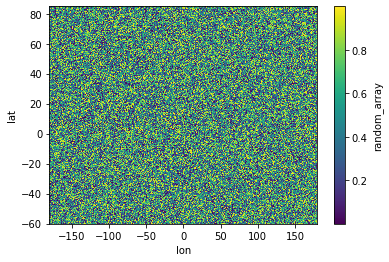

In [22]:
ds.random_array.plot();

In [3]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url, drop_variables=['time_bnds'])
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 2006)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-02-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    geospatial_lon_min:              -1.0
    geospatial_lon_max:              359.0
    geospatial_laty_max:             89.0
    geospatial_laty_min:             -89.0
    geospatial_lat_max:              89.0
    geospatial_lat_min:              -89.0
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    cdm_data_type:                   Grid
    project:                         NOAA Extended Reconstructed Sea Surface ...
    original_publisher_url:          http://www.ncdc.noaa.gov
    References:                      https://www.ncdc.noaa.gov/data-access/ma...
    source:                          In situ data: ICOADS R3.0 before 2015, N...
    title:                           NOAA ERSSTv5 (in situ only)
    history:                         created 07/2017 by PSD data using NCEI's...
    institution:                     This version written at NOAA/ESRL PSD: o...
    citation:                        Huang et al, 2017: Extended Reconstructe...
    platform:                        Ship and Buoy SSTs from ICOADS R3.0 and ...
    standard_name_vocabulary:        CF Standard Name Table (v40, 25 January ...
    processing_level:                NOAA Level 4
    Conventions:                     CF-1.6, ACDD-1.3
    metadata_link:                   :metadata_link = https://doi.org/10.7289...
    creator_name:                    Boyin Huang (original)
    date_created:                    2017-06-30T12:18:00Z (original)
    product_version:                 Version 5
    creator_url_original:            https://www.ncei.noaa.gov
    license:                         No constraints on data access or use
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    data_modified:                   2021-03-07
    DODS_EXTRA.Unlimited_Dimension:  time

In [11]:
sst = ds['sst']
sst

<xarray.DataArray 'sst' (time: 2006, lat: 89, lon: 180)>
[32136120 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-02-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    _ChunkSizes:   [  1  89 180]

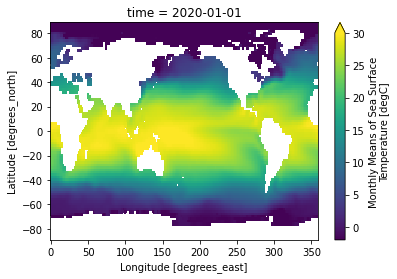

In [12]:
sst.sel(time='2020-01-01').plot(vmin=-2, vmax=30);

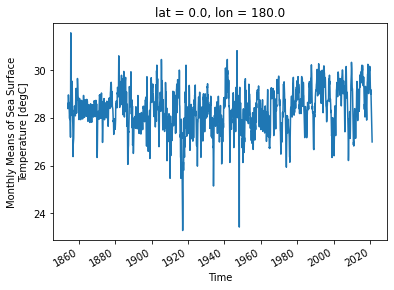

In [14]:
da.sel(lon=180, lat=0).plot();

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

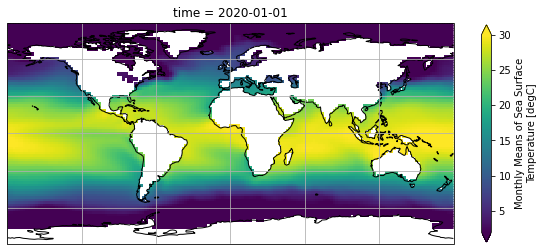

In [28]:
fig = plt.figure(figsize=(10, 5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()

sst.sel(
    time='2020-01-01'
).plot(
    ax=ax, 
    transform=ccrs.PlateCarree(), 
    vmin=2, 
    vmax=30, 
    cbar_kwargs={'shrink': 0.8}
)

plt.show()

For more information, see the [documentation](http://xarray.pydata.org/en/stable/).